## Analiza Guinnessovih Svetovnih Rekordov

V tem projektu bomo analizirali podatke, povezane z Guinnessovimi svetovnimi rekordi.
Cilj je raziskati porazdelitev rekordov po kategorijah, njihovo geografsko razširjenost in časovne trende.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8')

df = pd.read_csv('guinness_rekordi.csv')

print(f"Število vnosov: {len(df)}")

Podatki uspešno naloženi
Število vnosov: 53


### Pregled podatkov

Spodaj je prvih pet vnosov, ki nam pokažejo, katere podatke o rekordih smo zbrali.


In [ ]:
display(df.head())

,naslov,definicija,kategorija,leto,lokacija,tip,url
0,Longest reef,"The Great Barrier Reef off Queensland, north-e...",nature,1962,United Kingdom,longest,https://www.guinnessworldrecords.com/world-rec...
1,Most dangerous ant,The most dangerous ant in the world is the bul...,nature,1936,United Kingdom,most,https://www.guinnessworldrecords.com/world-rec...
2,Most dangerous tree,"A member of the spurge family, the world’s mos...",nature,2011,United States,most,https://www.guinnessworldrecords.com/world-rec...
3,Tallest waterfall,"The tallest waterfall is Kerepakupai Merú, aka...",nature,1956,United Kingdom,tallest,https://www.guinnessworldrecords.com/world-rec...
4,Largest mammal to build a nest,The largest mammal to construct a nest is the ...,nature,2004,United Kingdom,largest,https://www.guinnessworldrecords.com/world-rec...


### Analiza po kategorijah

Zanima nas, kako so rekordi porazdeljeni med različnimi kategorijami. 

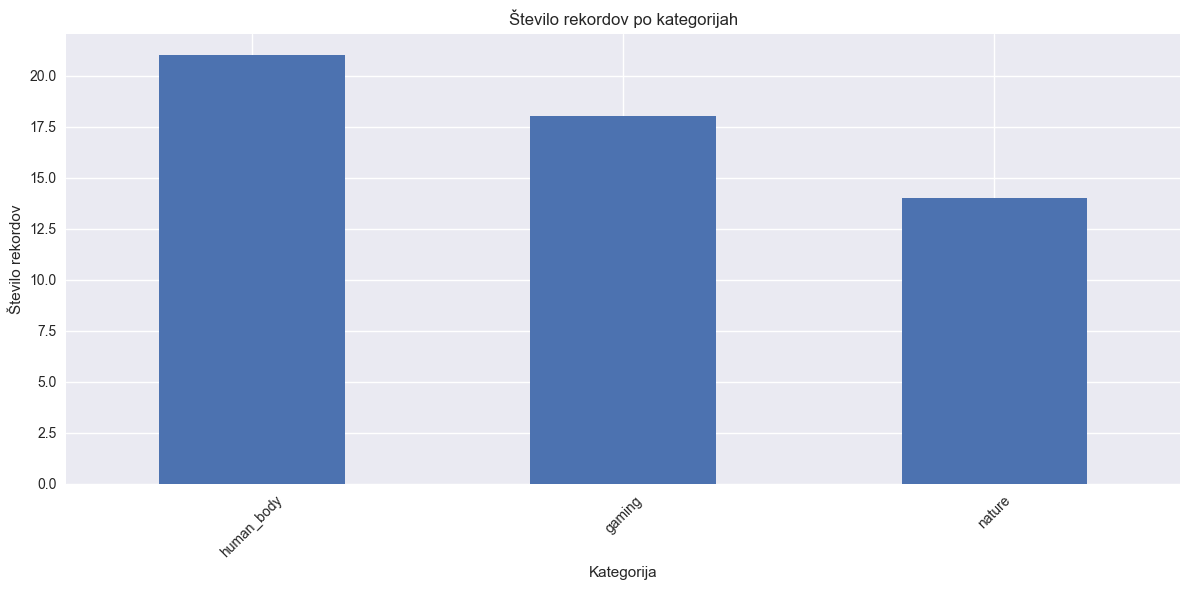

Število rekordov po kategorijah:
human_body: 21
gaming: 18
nature: 14


In [3]:
kategorije_count = df['kategorija'].value_counts()

plt.figure(figsize=(12, 6))
kategorije_count.plot(kind='bar')
plt.title('Število rekordov po kategorijah')
plt.xlabel('Kategorija')
plt.ylabel('Število rekordov')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Število rekordov po kategorijah:")
for kat, count in kategorije_count.items():
    print(f"{kat}: {count}")


### Analiza po letih

Zanimivo bi bilo pogledati, v katerih letih je bilo ustanovljenih največ rekordov. 
Domnevam, da bo število rekordov sčasoma naraščalo.


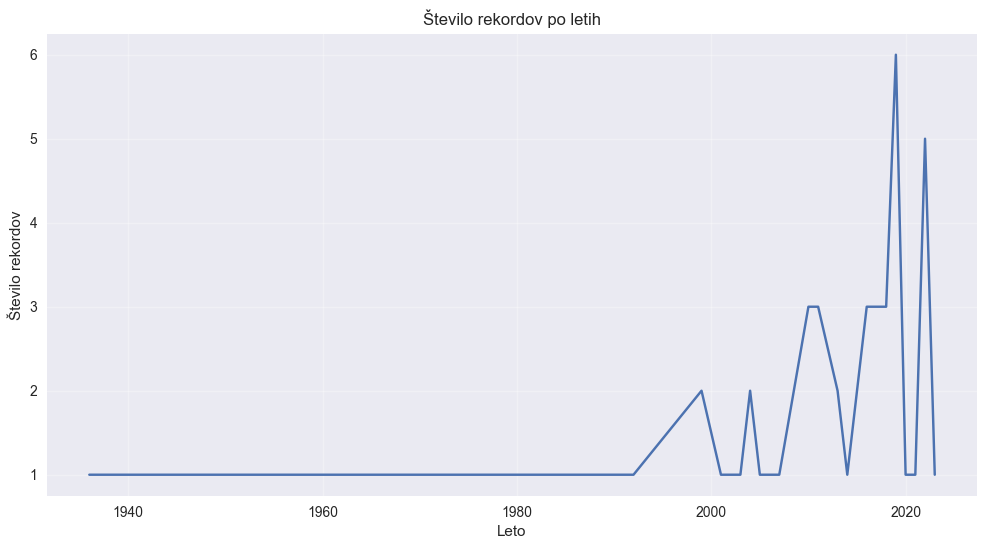

Obdobje z podatki: 1936 - 2023
Leto z največ rekordi: 2019 (6 rekordov)


In [4]:
leto_data = df[df['leto'] != 'Neznano'].copy()
leto_data['leto'] = pd.to_numeric(leto_data['leto'], errors='coerce')
leto_data = leto_data.dropna(subset=['leto'])

if not leto_data.empty:
    letno_stetje = leto_data['leto'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    letno_stetje.plot(kind='line')
    plt.title('Število rekordov po letih')
    plt.xlabel('Leto')
    plt.ylabel('Število rekordov')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Obdobje z podatki: {int(leto_data['leto'].min())} - {int(leto_data['leto'].max())}")
    print(f"Leto z največ rekordi: {letno_stetje.idxmax()} ({letno_stetje.max()} rekordov)")
else:
    print("Ni podatkov o letih za analizo")


### Analiza po lokacijah

Zanima me, iz katerih držav oz. regij prihaja največ rekordov. 
Pričakujem, da bo več rekordov iz ZDA in Evrope.


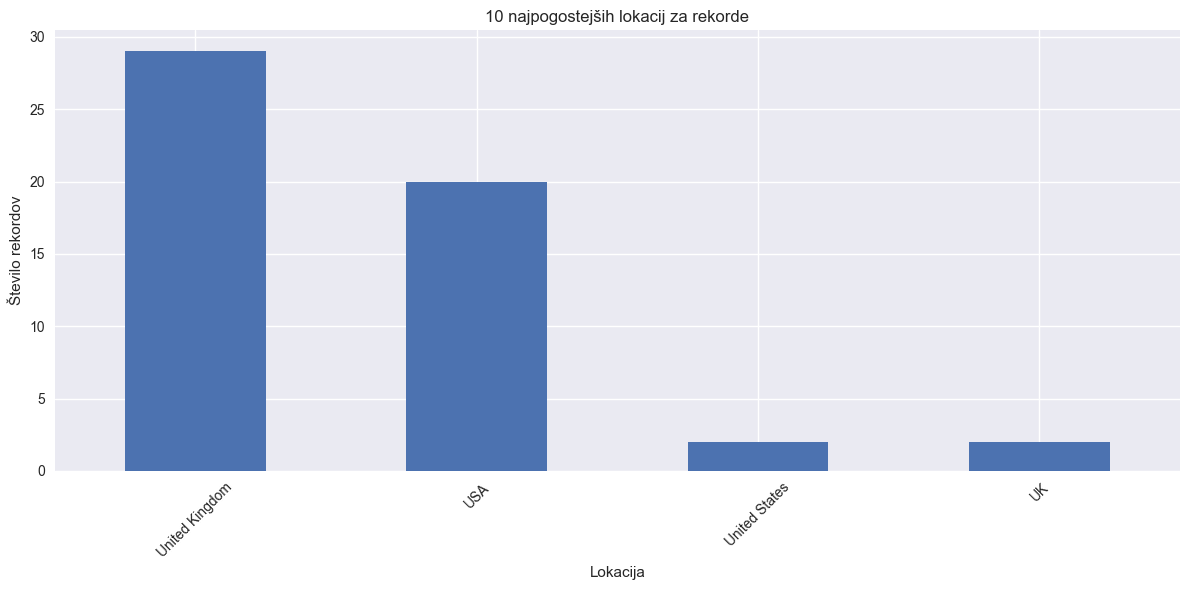

10 najpogostejših lokacij:
1. United Kingdom: 29
2. USA: 20
3. United States: 2
4. UK: 2


In [5]:
lokacije_count = df['lokacija'].value_counts()

plt.figure(figsize=(12, 6))
lokacije_count.head(10).plot(kind='bar')
plt.title('10 najpogostejših lokacij za rekorde')
plt.xlabel('Lokacija')
plt.ylabel('Število rekordov')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("10 najpogostejših lokacij:")
for i, (lok, count) in enumerate(lokacije_count.head(10).items(), 1):
    print(f"{i}. {lok}: {count}")


### Analiza tipov rekordov

Rekorde lahko razvrstimo glede na tip dosežka - na primer največji, najhitrejši, 
najdaljši itd. Zanimalo me je, katere vrste rekordov so najpogostejše.


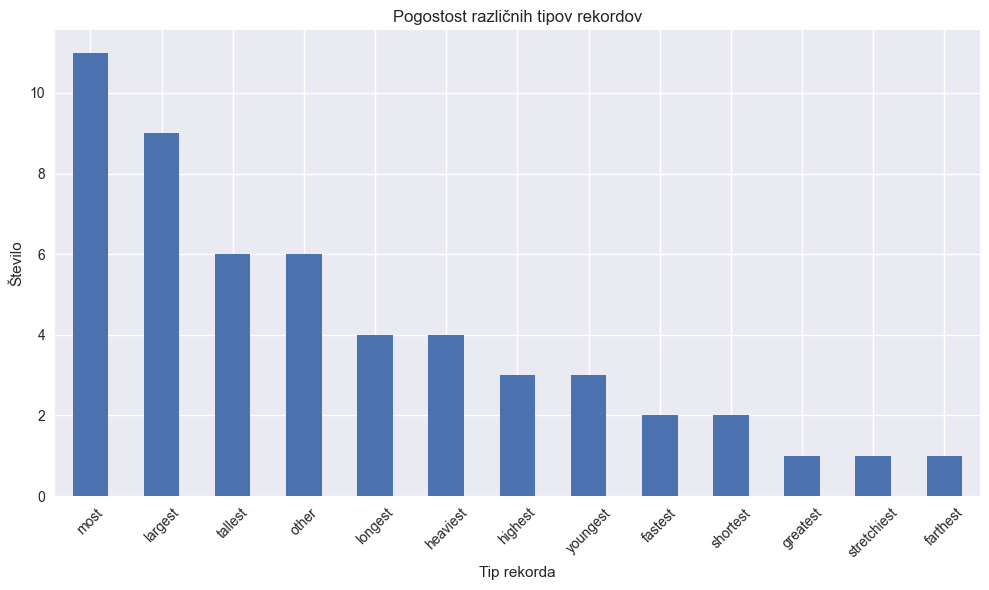

Pogostost tipov rekordov:
most: 11
largest: 9
tallest: 6
other: 6
longest: 4
heaviest: 4
highest: 3
youngest: 3
fastest: 2
shortest: 2
greatest: 1
stretchiest: 1
farthest: 1


In [6]:
tipi_count = df['tip'].value_counts()

plt.figure(figsize=(10, 6))
tipi_count.plot(kind='bar')
plt.title('Pogostost različnih tipov rekordov')
plt.xlabel('Tip rekorda')
plt.ylabel('Število')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Pogostost tipov rekordov:")
for tip, count in tipi_count.items():
    print(f"{tip}: {count}")


### Analiza dolžine naslovov

Preučil sem tudi dolžino naslovov rekordov. Zanimalo me je, ali so naslovi na splošno 
kratki in jedrnati ali daljši in bolj opisni.


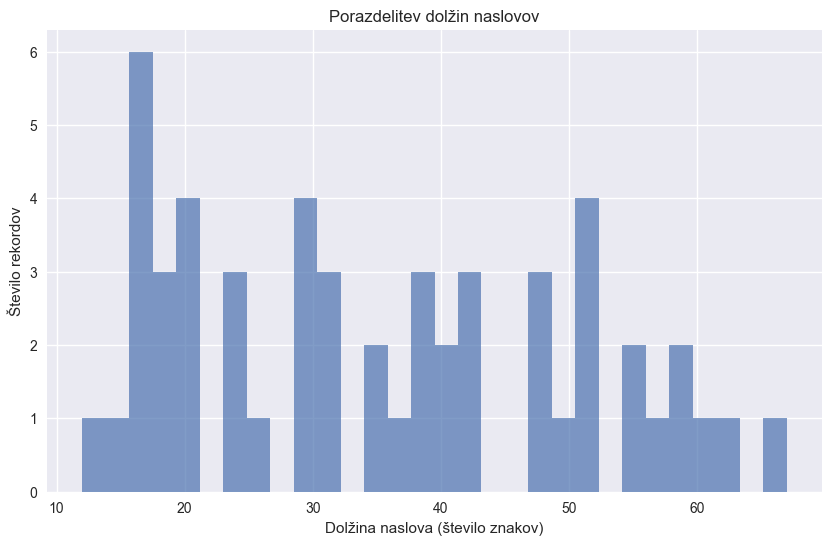

Povprečna dolžina naslova: 35.3 znakov
Najdaljši naslov: 67 znakov
Najkrajši naslov: 12 znakov


In [7]:
df['dolzina_naslova'] = df['naslov'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(df['dolzina_naslova'].dropna(), bins=30, alpha=0.7)
plt.title('Porazdelitev dolžin naslovov')
plt.xlabel('Dolžina naslova (število znakov)')
plt.ylabel('Število rekordov')
plt.show()

print(f"Povprečna dolžina naslova: {df['dolzina_naslova'].mean():.1f} znakov")
print(f"Najdaljši naslov: {df['dolzina_naslova'].max()} znakov")
print(f"Najkrajši naslov: {df['dolzina_naslova'].min()} znakov")


### Povezava med kategorijami in lokacijami

Zanimalo me je, ali obstaja povezava med tem, iz katerih lokacij prihajajo 
določene vrste rekordov.


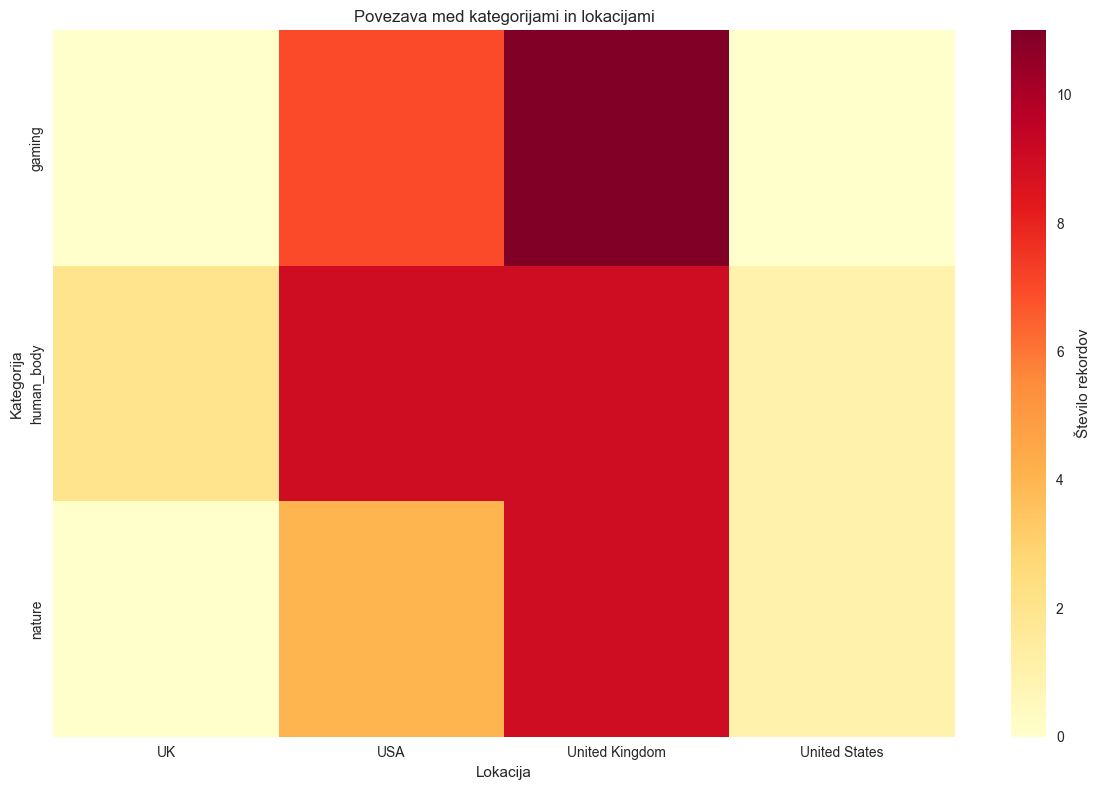

In [8]:
cross_tab = pd.crosstab(df['kategorija'], df['lokacija'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='YlOrRd', cbar_kws={'label': 'Število rekordov'})
plt.title('Povezava med kategorijami in lokacijami')
plt.xlabel('Lokacija')
plt.ylabel('Kategorija')
plt.tight_layout()
plt.show()


### Zaključek

Skozi to analizo sem ugotovil več zanimivih vzorcev v podatkih Guinnessovih svetovnih rekordov. 
Najdemo različno porazdelitev po kategorijah, z nekaterimi kategorijami, ki so precej bolj 
zastopane kot druge. Geografska analiza kaže na določene regije, kjer so rekordi posebno pogosti.

Omejitve analize vključujejo nepopolne podatke o letih in lokacijah za nekatere rekorde.


In [9]:
print("Analiza zaključena")
print(f"Skupaj analiziranih rekordov: {len(df)}")


Analiza zaključena
Skupaj analiziranih rekordov: 53
